<a href="https://colab.research.google.com/github/Poorna321288/Internship-assignments-/blob/main/CIFAR_10_CNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
625/625 - 36s - 57ms/step - accuracy: 0.4349 - loss: 2.2220 - val_accuracy: 0.5814 - val_loss: 1.6556 - learning_rate: 1.0000e-03
Epoch 2/10
625/625 - 24s - 39ms/step - accuracy: 0.5818 - loss: 1.5997 - val_accuracy: 0.5698 - val_loss: 1.6677 - learning_rate: 1.0000e-03
Epoch 3/10
625/625 - 42s - 67ms/step - accuracy: 0.6332 - loss: 1.4386 - val_accuracy: 0.5358 - val_loss: 2.0622 - learning_rate: 1.0000e-03
Epoch 4/10
625/625 - 25s - 39ms/step - accuracy: 0.6652 - loss: 1.3775 - val_accuracy: 0.7081 - val_loss: 1.2670 - learning_rate: 1.0000e-03
Epoch 5/10
625/625 - 24s - 38ms/step - accuracy: 0.6882 - loss: 1.3406 - val_accuracy: 0.6630 - val_loss: 1.5105 - learning_rate: 1.0000e-03
Epoch 6/10
625/625 - 24s - 38ms/step - accuracy: 0.7018 - loss: 1.3296 - val_accuracy: 0.6802 - val_loss: 1.4597 - learning_rate: 1.0000e-03
Epoch 7/10

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 - 41s

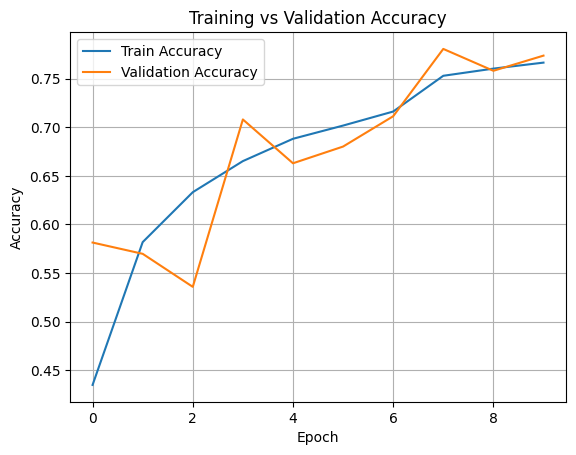

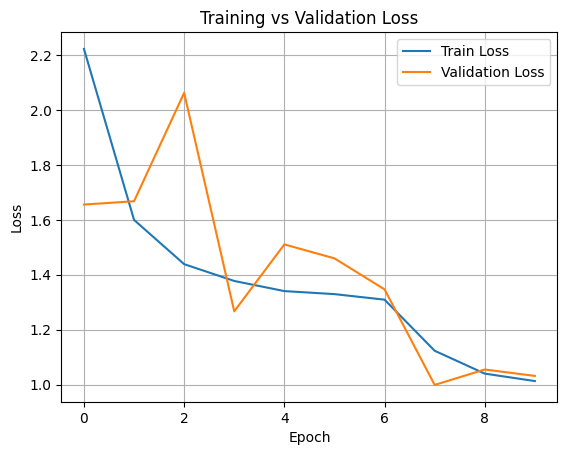

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


x_train_sub, x_val_sub, y_train_sub, y_val_sub = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_sub)


model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.35),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


history = model.fit(
    datagen.flow(x_train_sub, y_train_sub, batch_size=64),
    validation_data=(x_val_sub, y_val_sub),
    epochs=10,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()